<a href="https://colab.research.google.com/github/papichoolo/HeartDiseaseClassification/blob/main/heart_risk_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', 90)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score



Loading The Dataset

In [ ]:
df = pd.read_csv("framingham.csv")


In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Reading The Dataset

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


Data Preparation

In [ ]:
df = df.dropna(subset=['age'])

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 562.9 KB


Data Cleaning

In [ ]:
df.copy()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df = df.dropna(subset=["cigsPerDay","BPMeds","totChol","BMI","heartRate","education"])
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Checking any missing values

In [ ]:
def knn_impute(df, na_target):
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns

    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target] ##all the values of column(na_target) that are not missing.
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns] ##all the other column(leaving na_target) with no missing value
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    df.loc[df[na_target].isna() == True, na_target] = y_pred

    return df

In [ ]:
df=knn_impute(df,"glucose")

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df = df.reset_index(drop=True)

Picking the target data

In [ ]:
df2 = df.copy()

In [ ]:
df2 = df.iloc[:, :-1].values
target = df.iloc[:, -1].values

In [ ]:
df2

array([[  1.  ,  39.  ,   4.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  1.  ,  51.  ,   3.  , ...,  19.71,  65.  ,  68.  ],
       [  0.  ,  44.  ,   1.  , ...,  19.16,  86.  ,  76.8 ],
       [  0.  ,  52.  ,   2.  , ...,  21.47,  80.  , 107.  ]])

Data Visulalization

## Test-Train Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size = 0.2, random_state = 1)

In [ ]:
X_train


array([[ 0.  , 64.  ,  2.  , ..., 24.02, 78.  , 71.2 ],
       [ 1.  , 42.  ,  3.  , ..., 33.26, 80.  , 63.  ],
       [ 1.  , 38.  ,  1.  , ..., 28.88, 85.  , 80.  ],
       ...,
       [ 0.  , 56.  ,  1.  , ..., 22.89, 57.  , 82.  ],
       [ 1.  , 38.  ,  1.  , ..., 33.61, 72.  , 89.  ],
       [ 0.  , 46.  ,  3.  , ..., 27.22, 85.  , 75.  ]])

### Feature Scaling

In [ ]:
df3 = df2.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train= sc.fit_transform(X_train)

X_test= sc.transform(X_test)
X_train


array([[-0.87508898,  1.7174087 ,  0.01926405, ..., -0.42553491,
         0.19885364, -0.4563265 ],
       [ 1.14274093, -0.87622742,  0.99439191, ...,  1.82399412,
         0.36699477, -0.80910837],
       [ 1.14274093, -1.34779762, -0.95586381, ...,  0.75765893,
         0.78734759, -0.07773132],
       ...,
       [-0.87508898,  0.77426829, -0.95586381, ..., -0.70063965,
        -1.56662821,  0.00831303],
       [ 1.14274093, -1.34779762, -0.95586381, ...,  1.90920356,
        -0.30556974,  0.30946829],
       [-0.87508898, -0.40465721,  0.99439191, ...,  0.35352277,
         0.78734759, -0.29284222]])

Text(0.5, 0, 'Heart Attack risk')

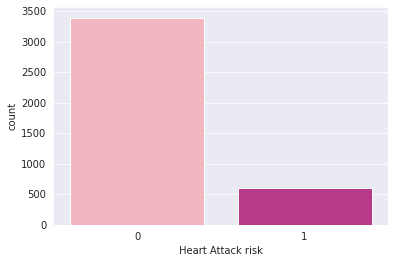

In [ ]:
sns.countplot(x = target, palette= 'RdPu')
plt.xlabel('Heart Attack risk')

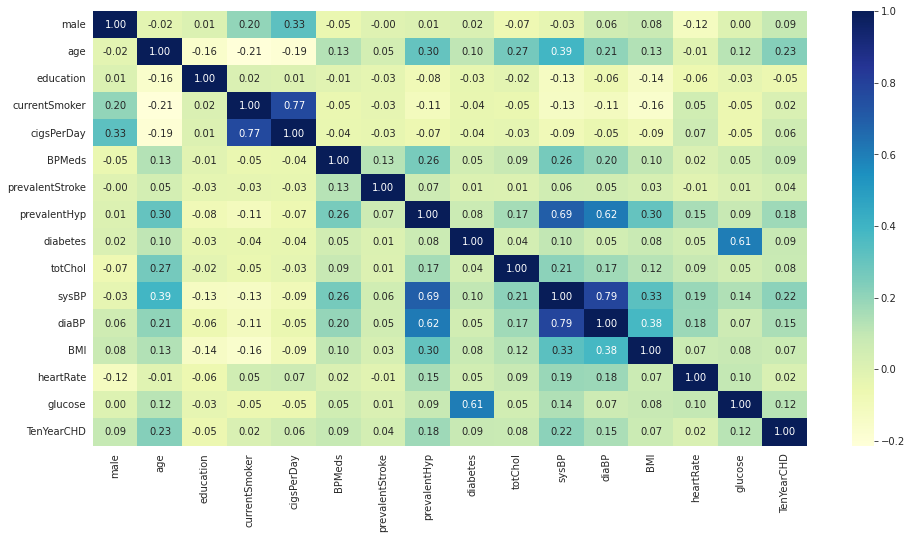

In [ ]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

# Implementing the Logistical regression model

### Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting the Test set results

### **Logistic Regression**

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[670   3]
 [116   9]]


0.8508771929824561

In [ ]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.1313868613138686


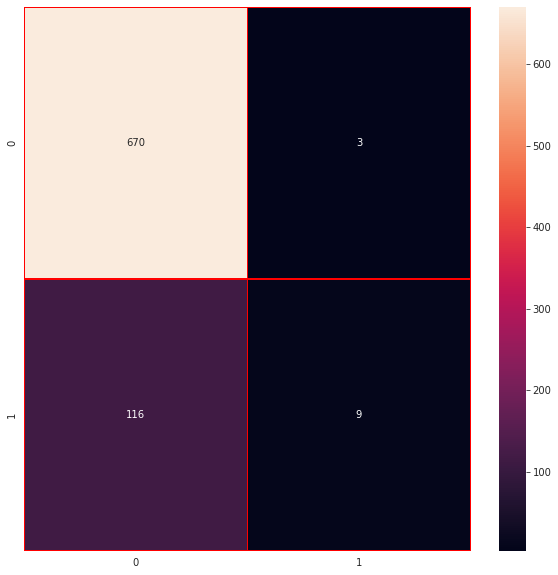

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()


### **Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8308270676691729


Confusion Matrix with seaborn heatmap

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

F1 Score Calculation

In [ ]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.3283582089552239


**Decision Tree (DT) Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy Score')
accuracy_score(y_test,y_pred)

[[562 111]
 [ 87  38]]
Accuracy Score


0.7518796992481203

In [ ]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.2773722627737227


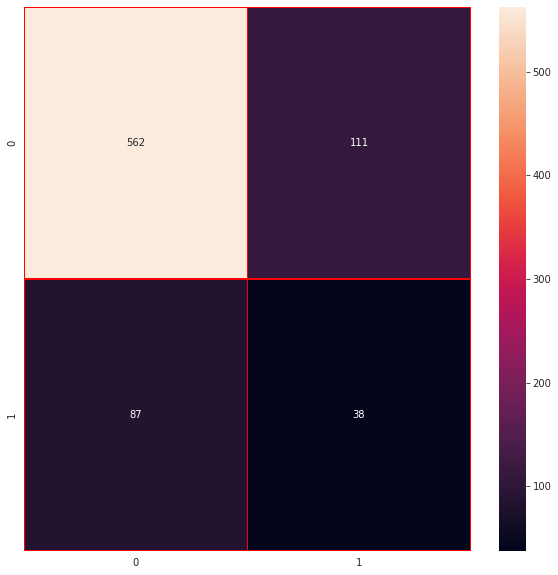

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()